### Title : Relatioship between Rebound Data and Win Rate in NBA Games

### Introduction:


We will analyze the NBA games data for both home and away teams to see if there is any correlation between the number of rebounds and their win rate. In general, the team has more rebound shows that they have less chances to let their opponents score. Our questions will be: “Can we use rebound numbers to precisely predict the win rate of the teams?” 

We are using two data frames which are games data and teams data. First, we will combine the team name from teams data to the games data. Then, we will particularly look at “REB_home” and “REB_away”, which represent the rebound number of a game for both teams. Next, we will look at “HOME_TEAM_WINS”, which indicate the winning team. The “HOME_TEAM_ID” and “VISITOR_TEAM_ID” will be used to identify the team name.


### Method

Our dataset contains detailed statistics on each aspect of both the home and away team, including Field goal %, Free throw %, 3 point %, rebounds, and assists. Using K-nearest values, we want to see if we can predict the outcome of a game(which team wins) to a high degree of accuracy with one or multiple of these parameters. To do this we will be using the “Tidyverse” and “Tidymodels” library in jupiter to create a model. We will be cross validating our data by 5 folds to downplay the effect of randomness on our accuracy. First we will create and tune the model to find the K-nearest value to the highest degree of accuracy, then we will run the model with the K value found to assess the accuracy of the model critically to answer the question “Can the number of rebounds be used as an accurate predictor of a games outcome?” If the model works poorly or is not accurate, we will be increasing the parameters to include more than just rebounds, but also possibly Field goal %, Free throw % etc.  By the method of forward selection, we want to see if we can improve our model’s accuracy and usefulness. To visualize which K value yields the greatest accuracy, we will be using a line graph. We can visualize the correlation between rebounds and number of wins by creating a bar graph. The graph would include two columns,  one tallying the total number of games where the winner had more rebounds and the other tallying the number of games where the winner had less rebounds.
There would also be a visualization in the form of a line graph showing the relationship between the number of predictors vs. accuracy for us to better understand what is the best number of predictors to include.


### Expected outcomes and significance:

We expect that a team having higher rebound numbers should have a higher win rate in the game. We want to find the accuracy and correlation between the rebound number and win rate. It provides the insight of how much effort an NBA team puts resources in finding a player who is good at taking rebound and how much training time should be invested in rebound training. If the correlation is high, obviously the team should put more time in the rebound training instead of other training like 3-points, free throw training. The future question can be the correlation between rebound and other game data to increase the accuracy of our model. For example, the rebound data may sometimes affect the points made in a game. 

### Preliminary exploratory data analysis:


In [4]:
library(tidyverse)
library(tidymodels)
library(repr)
read_csv("data/games.csv")

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3      ✔ yardstick 0.0.7 

Warning message:
“package ‘broom’ was built under R version 4.0.2”
Warning message:
“package ‘dials’ was built under R version 4.0.2”
Warning message:
“package ‘infer’ was built under R version 4.0.3”
Warning message:
“package ‘modeldata’ was built under R version 4.0.1”
Warning message:
“package ‘parsnip’ was built under R version 4.0.2”
Warning message:
“package ‘recipes’ was built under R version 4.0.1”
Warning message:
“package ‘tune’ was built under R version 4.0.2”
Warning message:
“package ‘workflows’ was built under R version 4.0.2”
Warning message:
“package ‘yardstick’ was built under R version 4.0.2”
── Conflicts ────

ERROR: Error: 'data/games.csv' does not exist in current working directory ('/home/jupyter/Project_new/DSCI-Group29').


Parsed with column specification:
cols(
  .default = col_double(),
  GAME_DATE_EST = col_date(format = ""),
  GAME_STATUS_TEXT = col_character()
)

See spec(...) for full column specifications.



GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,⋯,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104,0.398,0.760,⋯,23,53,1610612750,113,0.422,0.875,0.357,21,46,0
2022-03-12,22101006,Final,1610612741,1610612739,2021,1610612741,101,0.443,0.933,⋯,20,46,1610612739,91,0.419,0.824,0.208,19,40,1
2022-03-12,22101007,Final,1610612759,1610612754,2021,1610612759,108,0.412,0.813,⋯,28,52,1610612754,119,0.489,1.000,0.389,23,47,0
2022-03-12,22101008,Final,1610612744,1610612749,2021,1610612744,122,0.484,0.933,⋯,33,55,1610612749,109,0.413,0.696,0.386,27,39,1
2022-03-12,22101009,Final,1610612743,1610612761,2021,1610612743,115,0.551,0.750,⋯,32,39,1610612761,127,0.471,0.760,0.387,28,50,0
2022-03-12,22101010,Final,1610612762,1610612758,2021,1610612762,134,0.558,0.710,⋯,21,44,1610612758,125,0.500,0.857,0.394,27,33,1


Parsed with column specification:
cols(
  .default = col_double(),
  GAME_DATE_EST = col_date(format = ""),
  GAME_STATUS_TEXT = col_character()
)

See spec(...) for full column specifications.



REB_home,REB_away,HOME_TEAM_WINS,REB_ratio
<dbl>,<dbl>,<fct>,<dbl>
53,46,0,1.1521739
46,40,1,1.1500000
52,47,0,1.1063830
55,39,1,1.4102564
39,50,0,0.7800000
44,33,1,1.3333333
43,35,1,1.2285714
49,37,1,1.3243243
47,36,1,1.3055556


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 76 rows containing non-finite values (stat_bin).”


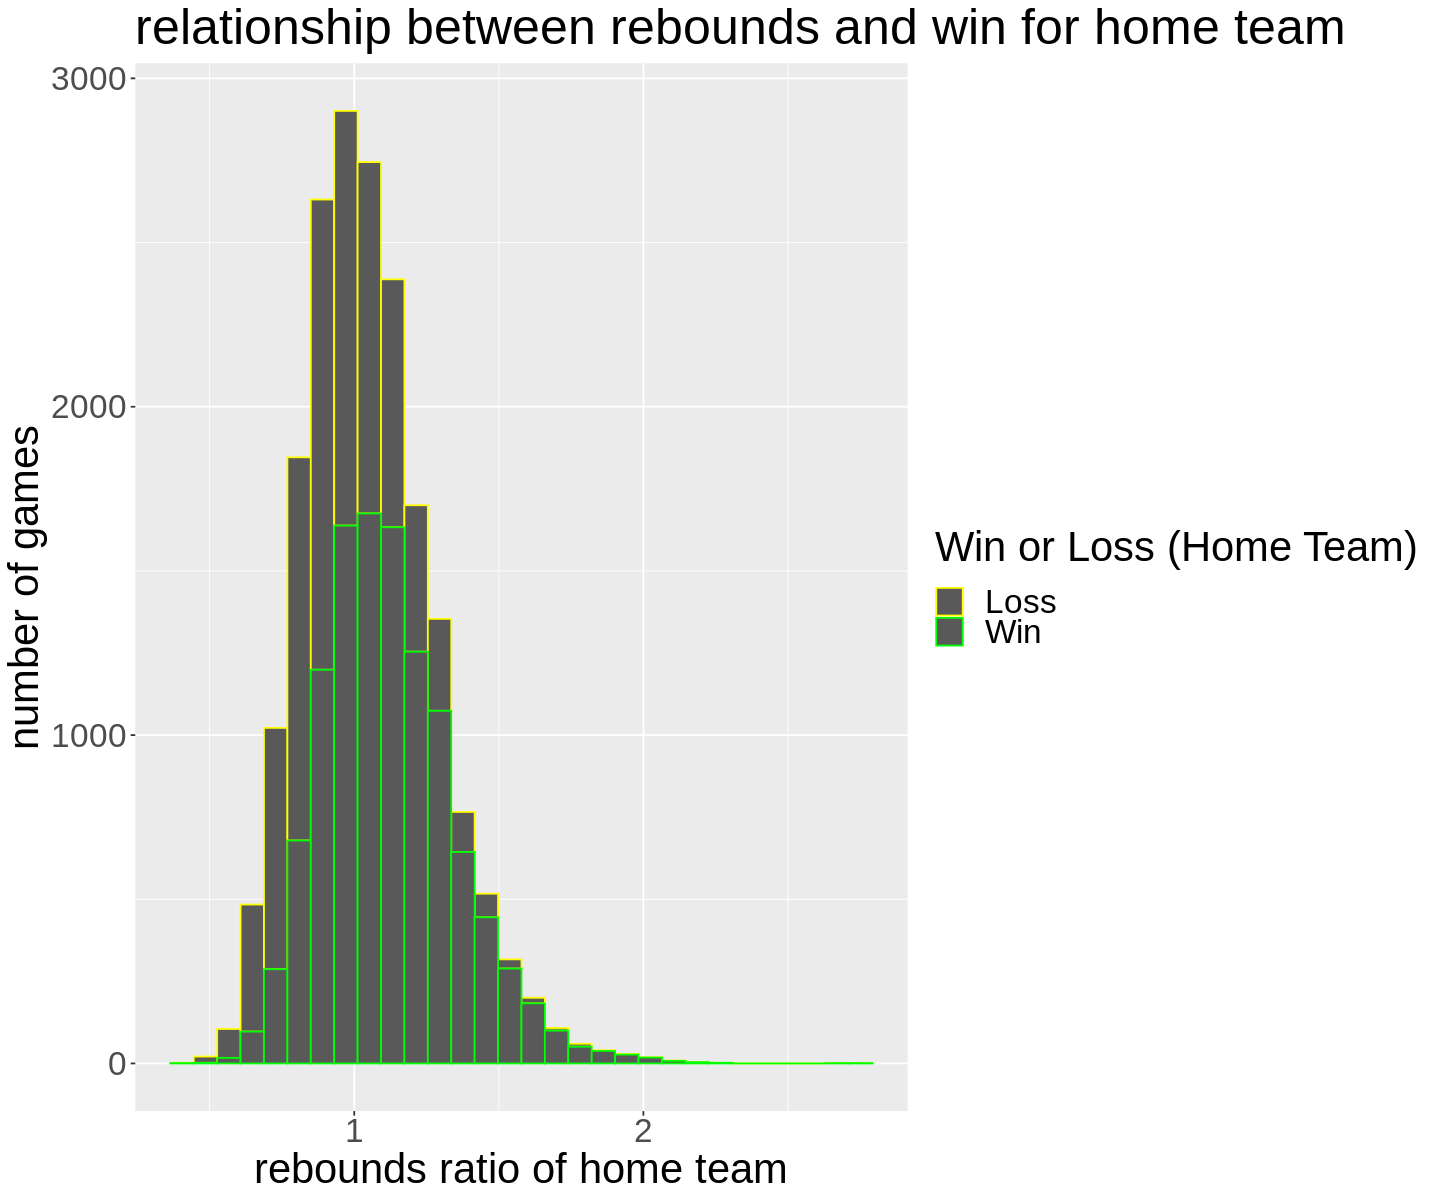

In [9]:
game_head <- read_csv("games.csv")%>%
head()
game_head

game <- read_csv("games.csv") %>%
select(REB_home, REB_away, HOME_TEAM_WINS)%>%
mutate(REB_ratio= REB_home/REB_away)%>%
mutate(HOME_TEAM_WINS= as_factor(HOME_TEAM_WINS))
game

game_split <- initial_split(game, prop = 0.75, strata = HOME_TEAM_WINS)  
game_train <- training(game_split)   
game_test <- testing(game_split)


options(repr.plot.width = 12, repr.plot.height = 10)
rebound_plot <- game_train %>%
ggplot(aes(x=REB_ratio, color = HOME_TEAM_WINS))+
geom_histogram(position="stack")+
xlab("rebounds ratio of home team")+
ylab("number of games")+
scale_color_manual(name="Win or Loss (Home Team)",
                   labels=c("Loss","Win"),
                           values=c("yellow","green"))+
ggtitle("relationship between rebounds and win for home team")+
theme(text=element_text(size=25))
rebound_plot